In [14]:
import torch
from torch.autograd import Variable
import torch.nn as nn



import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [15]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)



In [16]:
import util
X, Y = util.load_dataset('data.csv', add_intercept=False)
# Set the mean and standard deviation for the Gaussian noise
mean = 0
std_dev = 0.35

# Generate the Gaussian noise
noise = np.random.normal(mean, std_dev, X.shape)
# X = X + noise
X = torch.from_numpy(X).type(torch.FloatTensor)
Y = torch.from_numpy(Y).type(torch.FloatTensor)
print(X)

tensor([[2.1600, 2.3200],
        [2.7000, 2.0800],
        [1.5800, 2.7000],
        [1.2000, 2.9800],
        [1.0200, 2.9400],
        [3.2200, 3.6400],
        [3.5400, 0.6800],
        [1.2800, 0.9200],
        [1.7200, 1.9000],
        [3.7000, 0.4200],
        [2.7000, 3.1200],
        [2.5400, 1.5200],
        [0.0600, 0.8600],
        [0.2800, 2.5400],
        [2.2200, 0.9000],
        [1.8000, 2.5800],
        [0.4000, 2.7200],
        [2.2600, 1.0200],
        [3.7200, 1.3800],
        [1.7200, 2.7800],
        [1.9600, 3.4000],
        [3.3200, 1.7800],
        [0.1200, 3.3000],
        [2.1000, 3.1200],
        [3.7200, 3.3600],
        [1.7400, 0.2200],
        [2.2800, 2.7400],
        [3.4600, 2.4800],
        [2.0000, 2.6800],
        [2.2400, 1.9200],
        [3.4200, 3.7000],
        [3.4000, 2.2000],
        [2.1000, 1.0000],
        [0.0200, 1.7400],
        [1.9200, 2.0000],
        [2.1400, 0.2800],
        [0.7600, 1.1800],
        [1.3800, 1.9200],
        [3.3

In [17]:
class Triangle(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(Triangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin2 = nn.Linear(3, output_dim)
        
    def lin1ac(self, x):
        x = self.lin1(x)
        x = torch.sigmoid(x)
        return x
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
        return x
    
    def forward(self, x):
#         print('x', x)
        x = self.lin1ac(x)  
#         print('h', x.size(), x)
        x = self.lin2ac(x)  
#         x = F.relu(x)
        return x

In [18]:
model = Triangle()


In [19]:
#Init with optimal weights
def weights_init_optimal(model):
    lin1_weights = torch.Tensor([[-1,0],[0,-1],[1,1]])
    lin1_bias = torch.Tensor([0.5, 0.5, -4])
    lin2_weights = torch.Tensor([1 ,1 ,1])
    lin2_bias = torch.Tensor([0])
    with torch.no_grad():
        model.lin1.weight.copy_(lin1_weights)
        model.lin1.bias.copy_(lin1_bias)
        model.lin2.weight.copy_(lin2_weights)
        model.lin2.bias.copy_(lin2_bias)

In [20]:
# weights_init(model)
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
# weights_init_optimal(model)
weights_init(model)

In [21]:
x1 = torch.Tensor([0.2,2])
pred = model(x1)
print(pred)

tensor([0.8042], grad_fn=<ViewBackward0>)


In [98]:
y_hat = model(X)
print(y_hat)
print (Y.size())
loss = loss_func.forward(y_hat, Y)
print(loss)

tensor([0.8011, 0.7943, 0.8068, 0.8092, 0.8092, 0.8106, 0.7057, 0.7655, 0.7945,
        0.6822, 0.8085, 0.7762, 0.7917, 0.8082, 0.7472, 0.8053, 0.8090, 0.7536,
        0.7567, 0.8073, 0.8104, 0.7813, 0.8114, 0.8091, 0.8090, 0.7260, 0.8061,
        0.8002, 0.8060, 0.7923, 0.8107, 0.7944, 0.7550, 0.8028, 0.7958, 0.7159,
        0.7834, 0.7967, 0.8095, 0.8078, 0.7994, 0.8115, 0.7803, 0.7241, 0.8071,
        0.7665, 0.7910, 0.8105, 0.8119, 0.8092, 0.7523, 0.8110, 0.8120, 0.8111,
        0.8118, 0.7911, 0.8098, 0.7863, 0.7919, 0.7925, 0.7958, 0.8112, 0.6797,
        0.8112, 0.8118, 0.8072, 0.8070, 0.7441, 0.8069, 0.8066, 0.8106, 0.8117,
        0.7867, 0.6720, 0.7513, 0.7584, 0.8022, 0.8070, 0.8055, 0.7953, 0.8092,
        0.8087, 0.7751, 0.8028, 0.8108, 0.8109, 0.8111, 0.7630, 0.7471, 0.6819,
        0.8091, 0.7994, 0.8081, 0.7100, 0.7995, 0.7338, 0.8105, 0.7934, 0.7865,
        0.8115, 0.7853, 0.8098, 0.8026, 0.8111, 0.7983, 0.7693, 0.8101, 0.7123,
        0.8108, 0.8043, 0.8014, 0.8111, 

In [99]:
# epochs = 2000
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat = model(X)
# #         print(y_hat)
#     loss = loss_func.forward(y_hat, Y)
#     loss.backward()
#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

In [22]:
epochs = 4000
batchsize = 16
steps = X.size(0)
for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var).squeeze()
#         print('y_hat=', y_hat, 'y_var=', y_var)
        loss = loss_func.forward(y_hat, y_var)
#         print(loss)
        loss.backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat = model(X)
    loss = loss_func.forward(y_hat, Y)
    print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

Epoch: 0, Loss: 0.36912035942077637, 
Epoch: 1, Loss: 0.35929617285728455, 
Epoch: 2, Loss: 0.358513742685318, 
Epoch: 3, Loss: 0.35795632004737854, 
Epoch: 4, Loss: 0.3576810956001282, 
Epoch: 5, Loss: 0.357461541891098, 
Epoch: 6, Loss: 0.3572518527507782, 
Epoch: 7, Loss: 0.3570418059825897, 
Epoch: 8, Loss: 0.35682663321495056, 
Epoch: 9, Loss: 0.3566024601459503, 
Epoch: 10, Loss: 0.35636526346206665, 
Epoch: 11, Loss: 0.35611096024513245, 
Epoch: 12, Loss: 0.35583481192588806, 
Epoch: 13, Loss: 0.35553207993507385, 
Epoch: 14, Loss: 0.35519787669181824, 
Epoch: 15, Loss: 0.3548276722431183, 
Epoch: 16, Loss: 0.354417622089386, 
Epoch: 17, Loss: 0.35396480560302734, 
Epoch: 18, Loss: 0.3534680902957916, 
Epoch: 19, Loss: 0.352928102016449, 
Epoch: 20, Loss: 0.35234734416007996, 
Epoch: 21, Loss: 0.3517303168773651, 
Epoch: 22, Loss: 0.35108253359794617, 
Epoch: 23, Loss: 0.3504105508327484, 
Epoch: 24, Loss: 0.34972071647644043, 
Epoch: 25, Loss: 0.34901902079582214, 
Epoch: 26, L

Epoch: 212, Loss: 0.27891048789024353, 
Epoch: 213, Loss: 0.27881115674972534, 
Epoch: 214, Loss: 0.2787129878997803, 
Epoch: 215, Loss: 0.2786160111427307, 
Epoch: 216, Loss: 0.2785201966762543, 
Epoch: 217, Loss: 0.27842554450035095, 
Epoch: 218, Loss: 0.278331995010376, 
Epoch: 219, Loss: 0.27823954820632935, 
Epoch: 220, Loss: 0.2781481444835663, 
Epoch: 221, Loss: 0.2780577540397644, 
Epoch: 222, Loss: 0.2779684066772461, 
Epoch: 223, Loss: 0.27788010239601135, 
Epoch: 224, Loss: 0.27779272198677063, 
Epoch: 225, Loss: 0.2777063250541687, 
Epoch: 226, Loss: 0.2776208519935608, 
Epoch: 227, Loss: 0.2775363028049469, 
Epoch: 228, Loss: 0.27745264768600464, 
Epoch: 229, Loss: 0.2773698568344116, 
Epoch: 230, Loss: 0.2772879898548126, 
Epoch: 231, Loss: 0.2772068977355957, 
Epoch: 232, Loss: 0.277126669883728, 
Epoch: 233, Loss: 0.27704721689224243, 
Epoch: 234, Loss: 0.2769686281681061, 
Epoch: 235, Loss: 0.27689075469970703, 
Epoch: 236, Loss: 0.27681371569633484, 
Epoch: 237, Loss:

Epoch: 429, Loss: 0.2683519423007965, 
Epoch: 430, Loss: 0.2683236002922058, 
Epoch: 431, Loss: 0.2682952880859375, 
Epoch: 432, Loss: 0.2682670056819916, 
Epoch: 433, Loss: 0.2682388722896576, 
Epoch: 434, Loss: 0.2682107985019684, 
Epoch: 435, Loss: 0.26818278431892395, 
Epoch: 436, Loss: 0.26815488934516907, 
Epoch: 437, Loss: 0.2681270241737366, 
Epoch: 438, Loss: 0.26809927821159363, 
Epoch: 439, Loss: 0.26807156205177307, 
Epoch: 440, Loss: 0.2680439352989197, 
Epoch: 441, Loss: 0.26801639795303345, 
Epoch: 442, Loss: 0.2679888904094696, 
Epoch: 443, Loss: 0.2679615020751953, 
Epoch: 444, Loss: 0.2679341733455658, 
Epoch: 445, Loss: 0.26790690422058105, 
Epoch: 446, Loss: 0.2678797245025635, 
Epoch: 447, Loss: 0.26785263419151306, 
Epoch: 448, Loss: 0.26782554388046265, 
Epoch: 449, Loss: 0.26779860258102417, 
Epoch: 450, Loss: 0.2677716910839081, 
Epoch: 451, Loss: 0.26774483919143677, 
Epoch: 452, Loss: 0.2677180767059326, 
Epoch: 453, Loss: 0.26769140362739563, 
Epoch: 454, Lo

Epoch: 640, Loss: 0.2635379135608673, 
Epoch: 641, Loss: 0.263518750667572, 
Epoch: 642, Loss: 0.2634996175765991, 
Epoch: 643, Loss: 0.2634805142879486, 
Epoch: 644, Loss: 0.2634613811969757, 
Epoch: 645, Loss: 0.2634423077106476, 
Epoch: 646, Loss: 0.26342323422431946, 
Epoch: 647, Loss: 0.2634041905403137, 
Epoch: 648, Loss: 0.26338517665863037, 
Epoch: 649, Loss: 0.263366162776947, 
Epoch: 650, Loss: 0.26334717869758606, 
Epoch: 651, Loss: 0.2633282244205475, 
Epoch: 652, Loss: 0.2633092701435089, 
Epoch: 653, Loss: 0.2632903754711151, 
Epoch: 654, Loss: 0.26327142119407654, 
Epoch: 655, Loss: 0.2632525563240051, 
Epoch: 656, Loss: 0.26323366165161133, 
Epoch: 657, Loss: 0.2632148563861847, 
Epoch: 658, Loss: 0.2631959617137909, 
Epoch: 659, Loss: 0.26317715644836426, 
Epoch: 660, Loss: 0.2631583511829376, 
Epoch: 661, Loss: 0.26313960552215576, 
Epoch: 662, Loss: 0.2631208002567291, 
Epoch: 663, Loss: 0.26310208439826965, 
Epoch: 664, Loss: 0.2630833387374878, 
Epoch: 665, Loss: 0

Epoch: 860, Loss: 0.25960174202919006, 
Epoch: 861, Loss: 0.2595842480659485, 
Epoch: 862, Loss: 0.2595667541027069, 
Epoch: 863, Loss: 0.25954923033714294, 
Epoch: 864, Loss: 0.259531706571579, 
Epoch: 865, Loss: 0.259514182806015, 
Epoch: 866, Loss: 0.25949665904045105, 
Epoch: 867, Loss: 0.2594791352748871, 
Epoch: 868, Loss: 0.25946158170700073, 
Epoch: 869, Loss: 0.25944405794143677, 
Epoch: 870, Loss: 0.2594265043735504, 
Epoch: 871, Loss: 0.25940895080566406, 
Epoch: 872, Loss: 0.2593913972377777, 
Epoch: 873, Loss: 0.25937381386756897, 
Epoch: 874, Loss: 0.25935623049736023, 
Epoch: 875, Loss: 0.2593386471271515, 
Epoch: 876, Loss: 0.25932106375694275, 
Epoch: 877, Loss: 0.259303480386734, 
Epoch: 878, Loss: 0.2592858672142029, 
Epoch: 879, Loss: 0.25926825404167175, 
Epoch: 880, Loss: 0.2592506408691406, 
Epoch: 881, Loss: 0.2592330276966095, 
Epoch: 882, Loss: 0.259215384721756, 
Epoch: 883, Loss: 0.25919774174690247, 
Epoch: 884, Loss: 0.25918009877204895, 
Epoch: 885, Loss:

Epoch: 1082, Loss: 0.25503310561180115, 
Epoch: 1083, Loss: 0.25500330328941345, 
Epoch: 1084, Loss: 0.2549733519554138, 
Epoch: 1085, Loss: 0.2549431025981903, 
Epoch: 1086, Loss: 0.2549126446247101, 
Epoch: 1087, Loss: 0.25488194823265076, 
Epoch: 1088, Loss: 0.2548510730266571, 
Epoch: 1089, Loss: 0.25481992959976196, 
Epoch: 1090, Loss: 0.2547885477542877, 
Epoch: 1091, Loss: 0.2547569274902344, 
Epoch: 1092, Loss: 0.25472503900527954, 
Epoch: 1093, Loss: 0.2546928822994232, 
Epoch: 1094, Loss: 0.2546604573726654, 
Epoch: 1095, Loss: 0.2546277940273285, 
Epoch: 1096, Loss: 0.2545948326587677, 
Epoch: 1097, Loss: 0.2545616030693054, 
Epoch: 1098, Loss: 0.25452807545661926, 
Epoch: 1099, Loss: 0.254494309425354, 
Epoch: 1100, Loss: 0.2544601857662201, 
Epoch: 1101, Loss: 0.2544257938861847, 
Epoch: 1102, Loss: 0.2543911039829254, 
Epoch: 1103, Loss: 0.2543560862541199, 
Epoch: 1104, Loss: 0.25432074069976807, 
Epoch: 1105, Loss: 0.25428506731987, 
Epoch: 1106, Loss: 0.254249036312103

Epoch: 1297, Loss: 0.23834767937660217, 
Epoch: 1298, Loss: 0.23822106420993805, 
Epoch: 1299, Loss: 0.23809348046779633, 
Epoch: 1300, Loss: 0.23796476423740387, 
Epoch: 1301, Loss: 0.2378348559141159, 
Epoch: 1302, Loss: 0.23770356178283691, 
Epoch: 1303, Loss: 0.2375708818435669, 
Epoch: 1304, Loss: 0.23743660748004913, 
Epoch: 1305, Loss: 0.23730070888996124, 
Epoch: 1306, Loss: 0.2371630221605301, 
Epoch: 1307, Loss: 0.23702342808246613, 
Epoch: 1308, Loss: 0.23688189685344696, 
Epoch: 1309, Loss: 0.23673829436302185, 
Epoch: 1310, Loss: 0.23659245669841766, 
Epoch: 1311, Loss: 0.23644445836544037, 
Epoch: 1312, Loss: 0.23629412055015564, 
Epoch: 1313, Loss: 0.2361413687467575, 
Epoch: 1314, Loss: 0.23598620295524597, 
Epoch: 1315, Loss: 0.23582850396633148, 
Epoch: 1316, Loss: 0.23566828668117523, 
Epoch: 1317, Loss: 0.23550555109977722, 
Epoch: 1318, Loss: 0.2353401929140091, 
Epoch: 1319, Loss: 0.23517227172851562, 
Epoch: 1320, Loss: 0.23500177264213562, 
Epoch: 1321, Loss: 0.

Epoch: 1511, Loss: 0.12476636469364166, 
Epoch: 1512, Loss: 0.12462817132472992, 
Epoch: 1513, Loss: 0.12449155747890472, 
Epoch: 1514, Loss: 0.12435650825500488, 
Epoch: 1515, Loss: 0.1242230087518692, 
Epoch: 1516, Loss: 0.1240910217165947, 
Epoch: 1517, Loss: 0.12396054714918137, 
Epoch: 1518, Loss: 0.12383152544498444, 
Epoch: 1519, Loss: 0.1237039640545845, 
Epoch: 1520, Loss: 0.12357782572507858, 
Epoch: 1521, Loss: 0.12345310300588608, 
Epoch: 1522, Loss: 0.12332979589700699, 
Epoch: 1523, Loss: 0.12320785969495773, 
Epoch: 1524, Loss: 0.12308727204799652, 
Epoch: 1525, Loss: 0.12296802550554276, 
Epoch: 1526, Loss: 0.12285007536411285, 
Epoch: 1527, Loss: 0.122733473777771, 
Epoch: 1528, Loss: 0.12261812388896942, 
Epoch: 1529, Loss: 0.12250403314828873, 
Epoch: 1530, Loss: 0.12239126116037369, 
Epoch: 1531, Loss: 0.12227965146303177, 
Epoch: 1532, Loss: 0.12216932326555252, 
Epoch: 1533, Loss: 0.12206017225980759, 
Epoch: 1534, Loss: 0.12195223569869995, 
Epoch: 1535, Loss: 0.

Epoch: 1724, Loss: 0.11274115741252899, 
Epoch: 1725, Loss: 0.11272070556879044, 
Epoch: 1726, Loss: 0.11270038038492203, 
Epoch: 1727, Loss: 0.11268015950918198, 
Epoch: 1728, Loss: 0.11266008764505386, 
Epoch: 1729, Loss: 0.1126401349902153, 
Epoch: 1730, Loss: 0.11262030154466629, 
Epoch: 1731, Loss: 0.11260060220956802, 
Epoch: 1732, Loss: 0.1125810295343399, 
Epoch: 1733, Loss: 0.11256158351898193, 
Epoch: 1734, Loss: 0.11254223436117172, 
Epoch: 1735, Loss: 0.11252300441265106, 
Epoch: 1736, Loss: 0.11250392347574234, 
Epoch: 1737, Loss: 0.11248493194580078, 
Epoch: 1738, Loss: 0.11246607452630997, 
Epoch: 1739, Loss: 0.1124473288655281, 
Epoch: 1740, Loss: 0.1124287098646164, 
Epoch: 1741, Loss: 0.11241018772125244, 
Epoch: 1742, Loss: 0.11239176988601685, 
Epoch: 1743, Loss: 0.1123734787106514, 
Epoch: 1744, Loss: 0.1123553067445755, 
Epoch: 1745, Loss: 0.11233721673488617, 
Epoch: 1746, Loss: 0.11231925338506699, 
Epoch: 1747, Loss: 0.11230137199163437, 
Epoch: 1748, Loss: 0.1

Epoch: 1931, Loss: 0.11020719259977341, 
Epoch: 1932, Loss: 0.1101999431848526, 
Epoch: 1933, Loss: 0.11019270122051239, 
Epoch: 1934, Loss: 0.11018545925617218, 
Epoch: 1935, Loss: 0.11017827689647675, 
Epoch: 1936, Loss: 0.11017110198736191, 
Epoch: 1937, Loss: 0.11016396433115005, 
Epoch: 1938, Loss: 0.1101568192243576, 
Epoch: 1939, Loss: 0.11014974117279053, 
Epoch: 1940, Loss: 0.11014266312122345, 
Epoch: 1941, Loss: 0.11013562977313995, 
Epoch: 1942, Loss: 0.11012862622737885, 
Epoch: 1943, Loss: 0.11012163013219833, 
Epoch: 1944, Loss: 0.110114686191082, 
Epoch: 1945, Loss: 0.11010774224996567, 
Epoch: 1946, Loss: 0.11010084301233292, 
Epoch: 1947, Loss: 0.11009393632411957, 
Epoch: 1948, Loss: 0.1100870743393898, 
Epoch: 1949, Loss: 0.11008024960756302, 
Epoch: 1950, Loss: 0.11007343232631683, 
Epoch: 1951, Loss: 0.11006663739681244, 
Epoch: 1952, Loss: 0.11005987972021103, 
Epoch: 1953, Loss: 0.11005314439535141, 
Epoch: 1954, Loss: 0.11004640907049179, 
Epoch: 1955, Loss: 0.

Epoch: 2145, Loss: 0.10905998200178146, 
Epoch: 2146, Loss: 0.10905582457780838, 
Epoch: 2147, Loss: 0.10905171930789948, 
Epoch: 2148, Loss: 0.10904761403799057, 
Epoch: 2149, Loss: 0.10904350131750107, 
Epoch: 2150, Loss: 0.10903941094875336, 
Epoch: 2151, Loss: 0.10903529822826385, 
Epoch: 2152, Loss: 0.10903122276067734, 
Epoch: 2153, Loss: 0.10902713239192963, 
Epoch: 2154, Loss: 0.1090230941772461, 
Epoch: 2155, Loss: 0.10901900380849838, 
Epoch: 2156, Loss: 0.10901495069265366, 
Epoch: 2157, Loss: 0.10901092737913132, 
Epoch: 2158, Loss: 0.109006866812706, 
Epoch: 2159, Loss: 0.10900282114744186, 
Epoch: 2160, Loss: 0.10899881273508072, 
Epoch: 2161, Loss: 0.10899478942155838, 
Epoch: 2162, Loss: 0.10899076610803604, 
Epoch: 2163, Loss: 0.1089867502450943, 
Epoch: 2164, Loss: 0.10898274183273315, 
Epoch: 2165, Loss: 0.1089787483215332, 
Epoch: 2166, Loss: 0.10897476226091385, 
Epoch: 2167, Loss: 0.1089707463979721, 
Epoch: 2168, Loss: 0.10896678268909454, 
Epoch: 2169, Loss: 0.1

Epoch: 2361, Loss: 0.1082841008901596, 
Epoch: 2362, Loss: 0.10828087478876114, 
Epoch: 2363, Loss: 0.10827766358852386, 
Epoch: 2364, Loss: 0.10827446728944778, 
Epoch: 2365, Loss: 0.10827125608921051, 
Epoch: 2366, Loss: 0.10826805979013443, 
Epoch: 2367, Loss: 0.10826485604047775, 
Epoch: 2368, Loss: 0.10826165229082108, 
Epoch: 2369, Loss: 0.1082584336400032, 
Epoch: 2370, Loss: 0.10825526714324951, 
Epoch: 2371, Loss: 0.10825208574533463, 
Epoch: 2372, Loss: 0.10824891179800034, 
Epoch: 2373, Loss: 0.10824573040008545, 
Epoch: 2374, Loss: 0.10824252665042877, 
Epoch: 2375, Loss: 0.10823936760425568, 
Epoch: 2376, Loss: 0.10823619365692139, 
Epoch: 2377, Loss: 0.10823298990726471, 
Epoch: 2378, Loss: 0.10822983831167221, 
Epoch: 2379, Loss: 0.10822665691375732, 
Epoch: 2380, Loss: 0.10822352021932602, 
Epoch: 2381, Loss: 0.10822038352489471, 
Epoch: 2382, Loss: 0.10821719467639923, 
Epoch: 2383, Loss: 0.10821403563022614, 
Epoch: 2384, Loss: 0.10821085423231125, 
Epoch: 2385, Loss:

Epoch: 2574, Loss: 0.10764985531568527, 
Epoch: 2575, Loss: 0.10764707624912262, 
Epoch: 2576, Loss: 0.10764433443546295, 
Epoch: 2577, Loss: 0.1076415628194809, 
Epoch: 2578, Loss: 0.10763879865407944, 
Epoch: 2579, Loss: 0.10763603448867798, 
Epoch: 2580, Loss: 0.1076333075761795, 
Epoch: 2581, Loss: 0.10763053596019745, 
Epoch: 2582, Loss: 0.10762780159711838, 
Epoch: 2583, Loss: 0.10762504488229752, 
Epoch: 2584, Loss: 0.10762228816747665, 
Epoch: 2585, Loss: 0.10761958360671997, 
Epoch: 2586, Loss: 0.1076168417930603, 
Epoch: 2587, Loss: 0.10761408507823944, 
Epoch: 2588, Loss: 0.10761135071516037, 
Epoch: 2589, Loss: 0.10760863125324249, 
Epoch: 2590, Loss: 0.10760585218667984, 
Epoch: 2591, Loss: 0.10760314017534256, 
Epoch: 2592, Loss: 0.10760041326284409, 
Epoch: 2593, Loss: 0.10759769380092621, 
Epoch: 2594, Loss: 0.10759495943784714, 
Epoch: 2595, Loss: 0.10759221017360687, 
Epoch: 2596, Loss: 0.10758950561285019, 
Epoch: 2597, Loss: 0.10758677870035172, 
Epoch: 2598, Loss: 

Epoch: 2791, Loss: 0.10709767788648605, 
Epoch: 2792, Loss: 0.10709543526172638, 
Epoch: 2793, Loss: 0.10709309577941895, 
Epoch: 2794, Loss: 0.10709074884653091, 
Epoch: 2795, Loss: 0.10708849877119064, 
Epoch: 2796, Loss: 0.10708614438772202, 
Epoch: 2797, Loss: 0.10708387941122055, 
Epoch: 2798, Loss: 0.1070815846323967, 
Epoch: 2799, Loss: 0.10707928985357285, 
Epoch: 2800, Loss: 0.1070769876241684, 
Epoch: 2801, Loss: 0.10707469284534454, 
Epoch: 2802, Loss: 0.1070723757147789, 
Epoch: 2803, Loss: 0.10707010328769684, 
Epoch: 2804, Loss: 0.10706782341003418, 
Epoch: 2805, Loss: 0.10706550627946854, 
Epoch: 2806, Loss: 0.10706322640180588, 
Epoch: 2807, Loss: 0.1070609912276268, 
Epoch: 2808, Loss: 0.10705870389938354, 
Epoch: 2809, Loss: 0.10705644637346268, 
Epoch: 2810, Loss: 0.10705418139696121, 
Epoch: 2811, Loss: 0.10705190896987915, 
Epoch: 2812, Loss: 0.1070496216416359, 
Epoch: 2813, Loss: 0.10704737156629562, 
Epoch: 2814, Loss: 0.10704509913921356, 
Epoch: 2815, Loss: 0.

Epoch: 3008, Loss: 0.10665033012628555, 
Epoch: 3009, Loss: 0.10664856433868408, 
Epoch: 3010, Loss: 0.10664676129817963, 
Epoch: 3011, Loss: 0.10664494335651398, 
Epoch: 3012, Loss: 0.10664312541484833, 
Epoch: 3013, Loss: 0.10664135962724686, 
Epoch: 3014, Loss: 0.10663954168558121, 
Epoch: 3015, Loss: 0.10663779079914093, 
Epoch: 3016, Loss: 0.10663598030805588, 
Epoch: 3017, Loss: 0.10663419961929321, 
Epoch: 3018, Loss: 0.10663242638111115, 
Epoch: 3019, Loss: 0.10663064569234848, 
Epoch: 3020, Loss: 0.1066288873553276, 
Epoch: 3021, Loss: 0.10662706941366196, 
Epoch: 3022, Loss: 0.10662531852722168, 
Epoch: 3023, Loss: 0.10662355273962021, 
Epoch: 3024, Loss: 0.10662181675434113, 
Epoch: 3025, Loss: 0.10662002861499786, 
Epoch: 3026, Loss: 0.10661828517913818, 
Epoch: 3027, Loss: 0.10661645978689194, 
Epoch: 3028, Loss: 0.10661476850509644, 
Epoch: 3029, Loss: 0.10661302506923676, 
Epoch: 3030, Loss: 0.10661125928163528, 
Epoch: 3031, Loss: 0.10660950094461441, 
Epoch: 3032, Loss

Epoch: 3220, Loss: 0.10632072389125824, 
Epoch: 3221, Loss: 0.10631943494081497, 
Epoch: 3222, Loss: 0.10631811618804932, 
Epoch: 3223, Loss: 0.10631682723760605, 
Epoch: 3224, Loss: 0.1063155010342598, 
Epoch: 3225, Loss: 0.10631418228149414, 
Epoch: 3226, Loss: 0.10631287097930908, 
Epoch: 3227, Loss: 0.10631156712770462, 
Epoch: 3228, Loss: 0.10631027072668076, 
Epoch: 3229, Loss: 0.1063089594244957, 
Epoch: 3230, Loss: 0.10630767047405243, 
Epoch: 3231, Loss: 0.10630639642477036, 
Epoch: 3232, Loss: 0.10630513727664948, 
Epoch: 3233, Loss: 0.10630381852388382, 
Epoch: 3234, Loss: 0.10630253702402115, 
Epoch: 3235, Loss: 0.10630124062299728, 
Epoch: 3236, Loss: 0.10629995912313461, 
Epoch: 3237, Loss: 0.10629868507385254, 
Epoch: 3238, Loss: 0.10629739612340927, 
Epoch: 3239, Loss: 0.1062961295247078, 
Epoch: 3240, Loss: 0.10629484802484512, 
Epoch: 3241, Loss: 0.10629359632730484, 
Epoch: 3242, Loss: 0.10629229992628098, 
Epoch: 3243, Loss: 0.1062910407781601, 
Epoch: 3244, Loss: 0

Epoch: 3435, Loss: 0.10608364641666412, 
Epoch: 3436, Loss: 0.10608278214931488, 
Epoch: 3437, Loss: 0.10608184337615967, 
Epoch: 3438, Loss: 0.10608094185590744, 
Epoch: 3439, Loss: 0.10608004033565521, 
Epoch: 3440, Loss: 0.10607914626598358, 
Epoch: 3441, Loss: 0.10607824474573135, 
Epoch: 3442, Loss: 0.10607736557722092, 
Epoch: 3443, Loss: 0.10607647895812988, 
Epoch: 3444, Loss: 0.10607554763555527, 
Epoch: 3445, Loss: 0.10607464611530304, 
Epoch: 3446, Loss: 0.106073759496212, 
Epoch: 3447, Loss: 0.10607285797595978, 
Epoch: 3448, Loss: 0.10607200860977173, 
Epoch: 3449, Loss: 0.1060711070895195, 
Epoch: 3450, Loss: 0.10607024282217026, 
Epoch: 3451, Loss: 0.10606932640075684, 
Epoch: 3452, Loss: 0.10606849193572998, 
Epoch: 3453, Loss: 0.10606756061315536, 
Epoch: 3454, Loss: 0.10606670379638672, 
Epoch: 3455, Loss: 0.10606583207845688, 
Epoch: 3456, Loss: 0.10606491565704346, 
Epoch: 3457, Loss: 0.10606406629085541, 
Epoch: 3458, Loss: 0.10606320202350616, 
Epoch: 3459, Loss: 

Epoch: 3651, Loss: 0.10592127591371536, 
Epoch: 3652, Loss: 0.10592062771320343, 
Epoch: 3653, Loss: 0.10592005401849747, 
Epoch: 3654, Loss: 0.10591944307088852, 
Epoch: 3655, Loss: 0.10591884702444077, 
Epoch: 3656, Loss: 0.10591822117567062, 
Epoch: 3657, Loss: 0.10591762512922287, 
Epoch: 3658, Loss: 0.10591699182987213, 
Epoch: 3659, Loss: 0.10591642558574677, 
Epoch: 3660, Loss: 0.10591579973697662, 
Epoch: 3661, Loss: 0.10591518133878708, 
Epoch: 3662, Loss: 0.10591458529233932, 
Epoch: 3663, Loss: 0.10591401159763336, 
Epoch: 3664, Loss: 0.10591336339712143, 
Epoch: 3665, Loss: 0.10591278970241547, 
Epoch: 3666, Loss: 0.10591219365596771, 
Epoch: 3667, Loss: 0.10591162741184235, 
Epoch: 3668, Loss: 0.1059110015630722, 
Epoch: 3669, Loss: 0.10591041296720505, 
Epoch: 3670, Loss: 0.10590982437133789, 
Epoch: 3671, Loss: 0.10590922087430954, 
Epoch: 3672, Loss: 0.10590860992670059, 
Epoch: 3673, Loss: 0.10590804368257523, 
Epoch: 3674, Loss: 0.10590743273496628, 
Epoch: 3675, Loss

Epoch: 3868, Loss: 0.10581107437610626, 
Epoch: 3869, Loss: 0.10581064224243164, 
Epoch: 3870, Loss: 0.10581021010875702, 
Epoch: 3871, Loss: 0.10580979287624359, 
Epoch: 3872, Loss: 0.10580938309431076, 
Epoch: 3873, Loss: 0.10580896586179733, 
Epoch: 3874, Loss: 0.10580853372812271, 
Epoch: 3875, Loss: 0.10580813139677048, 
Epoch: 3876, Loss: 0.10580773651599884, 
Epoch: 3877, Loss: 0.10580732673406601, 
Epoch: 3878, Loss: 0.10580690950155258, 
Epoch: 3879, Loss: 0.10580654442310333, 
Epoch: 3880, Loss: 0.10580607503652573, 
Epoch: 3881, Loss: 0.10580568015575409, 
Epoch: 3882, Loss: 0.10580530017614365, 
Epoch: 3883, Loss: 0.10580490529537201, 
Epoch: 3884, Loss: 0.10580448806285858, 
Epoch: 3885, Loss: 0.10580404847860336, 
Epoch: 3886, Loss: 0.10580366849899292, 
Epoch: 3887, Loss: 0.10580326616764069, 
Epoch: 3888, Loss: 0.10580287873744965, 
Epoch: 3889, Loss: 0.1058024913072586, 
Epoch: 3890, Loss: 0.10580210387706757, 
Epoch: 3891, Loss: 0.10580170154571533, 
Epoch: 3892, Loss

In [23]:
from matplotlib.ticker import MaxNLocator
def plot_contour(predict_fn, fig, ax):
    """Plot a contour given the provided prediction function"""
    x, y = np.meshgrid(np.linspace(0, 4, num=20), np.linspace(0, 4, num=20))
    z = np.zeros(x.shape)
    
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
#             print(predict_fn(np.array([[x[i, j], y[i, j]]])))
            z[i, j] = predict_fn(np.array([[x[i, j], y[i, j]]]))[0]

#     plt.contourf(x, y, z, levels=[-float('inf'), 0.1, 0.8, float('inf')], colors=['orange', 'cyan'])
#     locator=MaxNLocator(prune='both',nbins=5)
#     plt.set_major_locator(locator)  # Place major ticks at every multiple of 5
    contour = ax.contourf(x, y, z, levels=10, cmap='Pastel1', extend='both')
#     ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Example for y-axis
#     ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Example for x-axis

    # Add colorbar and labels
    fig.colorbar(contour, ax=ax)

def plot_dataset (x, y, save_path):
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'rx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'bo', linewidth=2,  mfc='none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)
    
    
def plot(x, y, predict_fn, save_path=None):
    """Plot dataset and fitted logistic regression parameters.

    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        save_path: Path to save the plot.
        correction: Correction factor to apply, if any.
    """
    # Plot dataset
#     plt.figure()
    
    # Create contour plot
    fig, ax = plt.subplots()
    
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    plot_contour(predict_fn, fig, ax)

    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    if save_path is not None:
        plt.savefig(save_path)


In [12]:
print(list(model.parameters()))

NameError: name 'model' is not defined

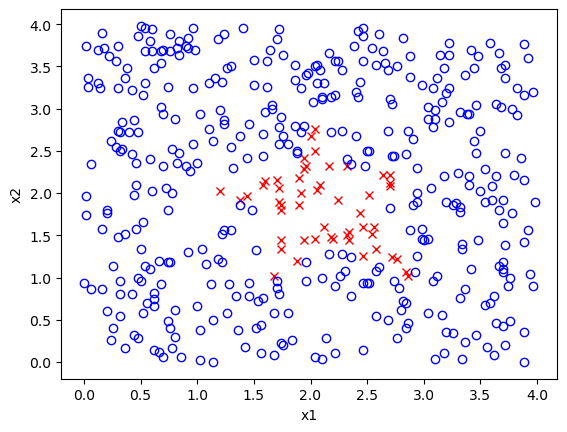

In [13]:
plot_dataset(X, Y, 'star_dataset')

In [3]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy()
lin1 = step_predict(X)
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy()
lin1ac = step_predict(X)
for i in range(32):
    print(X[i], lin1[i], lin1ac[i])


NameError: name 'X' is not defined

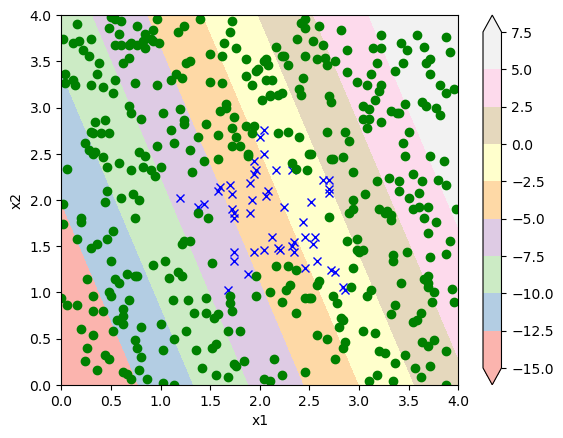

In [24]:
step_predict = lambda data: model.lin1(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict)

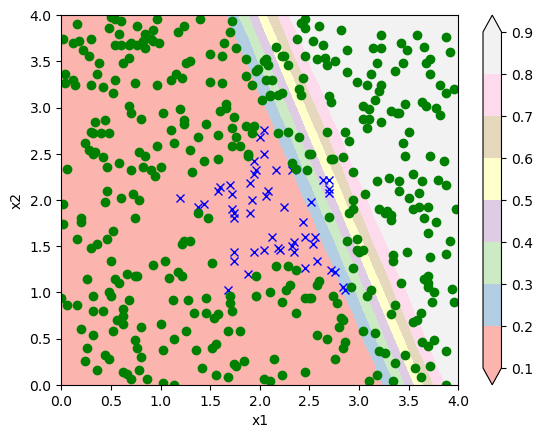

In [72]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h1star.pdf')

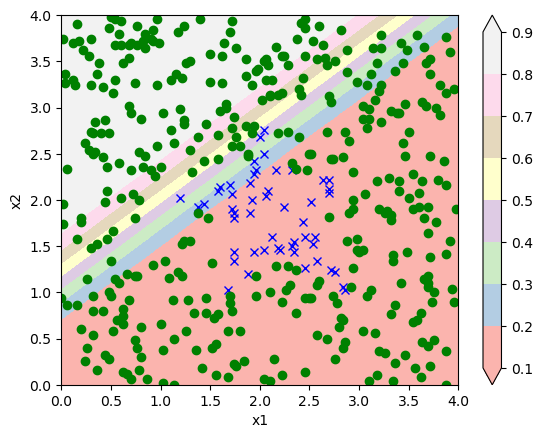

In [73]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h2star.pdf')

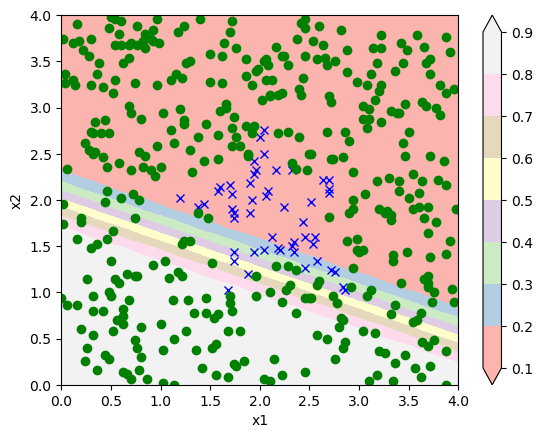

In [74]:
step_predict = lambda data: model.lin1ac(torch.Tensor(data)).detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_h3star.pdf')

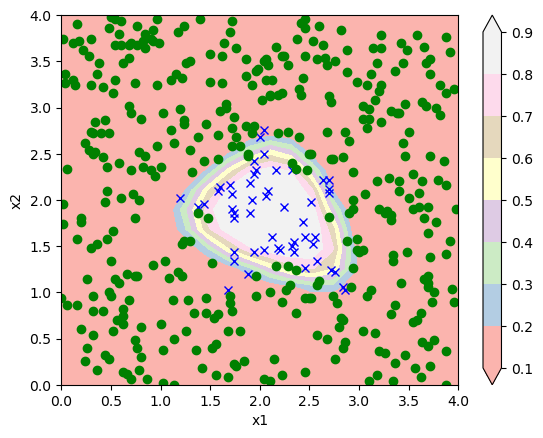

In [75]:
step_predict = lambda data: model(torch.Tensor(data)).detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'sigmoid_ostar.pdf')

In [59]:
# Same as linear regression! 
from vector_quantize import VectorQuantize

num_codes = 64

class VQTriangle(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(VQTriangle, self).__init__()
        self.lin1 = nn.Linear(input_dim, 3)
        self.lin2 = nn.Linear(3*2, output_dim)
        self.vq = VectorQuantize(dim=3, accept_image_fmap=False, codebook_size=num_codes,
    rotation_trick=True, straight_through=False, 
                                 learnable_codebook = True, 
                                 in_place_codebook_optimizer=optim.SGD,
                                 ema_update = False, 
#                                  use_cosine_sim = True
                                )
        
    def lin1ac(self, x):
#         print('x', x)
        x = self.lin1(x)
        x1 = torch.sigmoid(x)
        x2, indices, commit_loss = self.vq(x1)
        x = torch.cat((x2,x1),1)
#         x = x1+x2
        return x, indices, commit_loss
    
    def lin2ac(self, x):
        x = self.lin2(x)
#         print('yhat',x)
        x = torch.sigmoid(x)
        x = x.reshape(-1)
#         x = F.relu(x)
        return x
            
    def forward(self, x):
        x, indices, commit_loss = self.lin1ac(x)
#         print(x)
#         print('h', x.size(), x)
        x = self.lin2ac(x)

        return x, indices, commit_loss
    


In [60]:
def weights_copy_optimal(model1, model2):
    with torch.no_grad():
        model1.lin1.weight.copy_(model2.lin1.weight)
        model1.lin1.bias.copy_(model2.lin1.bias)
        model1.lin2.weight.copy_(model2.lin2.weight)
        model1.lin2.bias.copy_(model2.lin2.bias)

In [61]:
vqmodel = VQTriangle()
# weights_init_optimal(vqmodel)
weights_init(vqmodel)
# weights_copy_optimal(vqmodel, model)
optimizer = optim.SGD(vqmodel.parameters(), lr=0.02, momentum=0.9)
vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.08, momentum=0.9) 

In [62]:
# vqmodel.vq._codebook.embed = torch.nn.Parameter(torch.Tensor([[[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1] ]]))
# vqmodel.vq.in_place_codebook_optimizer = optim.SGD(vqmodel.vq._codebook.parameters(),lr=0.02, momentum=0.9) 

In [63]:
print((vqmodel.vq._codebook.embed))
print(list(vqmodel.parameters()))


Parameter containing:
tensor([[[-0.0799, -0.0746,  0.1541],
         [ 0.0923, -0.0909,  0.0071],
         [ 0.0363,  0.0467, -0.0100],
         [-0.0925, -0.0054, -0.0488],
         [-0.0593, -0.0876, -0.0857],
         [-0.0833,  0.0697, -0.1495],
         [-0.1681,  0.1512,  0.0635],
         [ 0.0978,  0.0771, -0.0674],
         [-0.1110, -0.1205, -0.0112],
         [ 0.0438, -0.1656, -0.1357],
         [ 0.0995,  0.0227,  0.1166],
         [ 0.1575,  0.1075, -0.0376],
         [-0.0787,  0.0500,  0.1438],
         [-0.1695,  0.0475, -0.1363],
         [-0.1405,  0.0640,  0.0899],
         [ 0.0605,  0.0514, -0.0534],
         [ 0.0043, -0.1561, -0.1153],
         [ 0.0036, -0.0405, -0.0275],
         [ 0.1005,  0.0664, -0.0375],
         [-0.0582, -0.1279,  0.0910],
         [-0.1243,  0.0548, -0.0321],
         [ 0.1376, -0.1128, -0.1155],
         [ 0.0204,  0.0052, -0.0760],
         [ 0.1766, -0.1513,  0.0958],
         [ 0.0861, -0.0408,  0.0626],
         [-0.0297, -0.1329, 

In [34]:
x1 = torch.Tensor([[0.2,2]])
pred, ind, comlos = vqmodel(x1)
print(pred)
for i in range(X.size(0)):
    y_hat, indi, comlos = vqmodel(X[i:i+1])
    loss = loss_func.forward(y_hat, Y[i:i+1])
    print(loss)

tensor([0.4054], grad_fn=<ViewBackward0>)
tensor(1.0742, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.1008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4388, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4583, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4665, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4061, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3907, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4275, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.0815, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3816, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4024, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.1402, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4802, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5116, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3742, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4102, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5032, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3716, grad_fn=<BinaryCrossEntro

tensor(0.5183, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3819, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.1671, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3794, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4022, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3571, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3758, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4529, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3540, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4278, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4475, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.1669, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4275, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3667, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3573, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(1.2063, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3582, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4994, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5397, grad_fn=<Bina

tensor(0.3571, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3435, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3295, grad_fn=<BinaryCrossEntropyBackward0>)


In [35]:
# epochs = 8000
# alpha=5
# for i in range(epochs):
#     optimizer.zero_grad()
#     y_hat, indices, commit_loss = vqmodel(X)
#     loss = loss_func.forward(y_hat, Y)
#     (loss + alpha * commit_loss).backward()

#     optimizer.step()

# #     if i % 500 == 0:
#     print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))
# #     print(list(vqmodel.parameters()))

In [64]:
alpha = 1
epochs = 4000
batchsize = 16
steps = X.size(0)
for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat, ind, commit_loss = vqmodel(x_var)
#         print('y_hat=', y_hat, 'y_var=', y_var)
        loss = loss_func.forward(y_hat.squeeze(), y_var)
#         print(loss)
        (loss + alpha * commit_loss).backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat,_,_ = vqmodel(X)
    loss = loss_func.forward(y_hat, Y)
    print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

Epoch: 0, Loss: 0.3632657527923584, 
Epoch: 1, Loss: 0.3632447123527527, 
Epoch: 2, Loss: 0.36258888244628906, 
Epoch: 3, Loss: 0.3605041205883026, 
Epoch: 4, Loss: 0.3590541183948517, 
Epoch: 5, Loss: 0.35767439007759094, 
Epoch: 6, Loss: 0.35629358887672424, 
Epoch: 7, Loss: 0.35517582297325134, 
Epoch: 8, Loss: 0.35391831398010254, 
Epoch: 9, Loss: 0.3529079854488373, 
Epoch: 10, Loss: 0.35180068016052246, 
Epoch: 11, Loss: 0.35073310136795044, 
Epoch: 12, Loss: 0.3499239385128021, 
Epoch: 13, Loss: 0.34885650873184204, 
Epoch: 14, Loss: 0.3477317690849304, 
Epoch: 15, Loss: 0.3466331958770752, 
Epoch: 16, Loss: 0.34559017419815063, 
Epoch: 17, Loss: 0.34466585516929626, 
Epoch: 18, Loss: 0.3433883488178253, 
Epoch: 19, Loss: 0.3424075245857239, 
Epoch: 20, Loss: 0.341010719537735, 
Epoch: 21, Loss: 0.3398906886577606, 
Epoch: 22, Loss: 0.3390585482120514, 
Epoch: 23, Loss: 0.3380793035030365, 
Epoch: 24, Loss: 0.3371475636959076, 
Epoch: 25, Loss: 0.33600106835365295, 
Epoch: 26, L

Epoch: 214, Loss: 0.26440587639808655, 
Epoch: 215, Loss: 0.26406022906303406, 
Epoch: 216, Loss: 0.26144692301750183, 
Epoch: 217, Loss: 0.25977852940559387, 
Epoch: 218, Loss: 0.2558564245700836, 
Epoch: 219, Loss: 0.2534768283367157, 
Epoch: 220, Loss: 0.2525794506072998, 
Epoch: 221, Loss: 0.25136688351631165, 
Epoch: 222, Loss: 0.2523048520088196, 
Epoch: 223, Loss: 0.25143325328826904, 
Epoch: 224, Loss: 0.251168429851532, 
Epoch: 225, Loss: 0.2503853738307953, 
Epoch: 226, Loss: 0.24872669577598572, 
Epoch: 227, Loss: 0.24550342559814453, 
Epoch: 228, Loss: 0.243841752409935, 
Epoch: 229, Loss: 0.24192571640014648, 
Epoch: 230, Loss: 0.24118973314762115, 
Epoch: 231, Loss: 0.2401808500289917, 
Epoch: 232, Loss: 0.2380901575088501, 
Epoch: 233, Loss: 0.23669792711734772, 
Epoch: 234, Loss: 0.2348521500825882, 
Epoch: 235, Loss: 0.23317721486091614, 
Epoch: 236, Loss: 0.22910545766353607, 
Epoch: 237, Loss: 0.22604574263095856, 
Epoch: 238, Loss: 0.22383365035057068, 
Epoch: 239, 

Epoch: 421, Loss: 0.12219896167516708, 
Epoch: 422, Loss: 0.12208998203277588, 
Epoch: 423, Loss: 0.12197639048099518, 
Epoch: 424, Loss: 0.12186563014984131, 
Epoch: 425, Loss: 0.12172267585992813, 
Epoch: 426, Loss: 0.12159042060375214, 
Epoch: 427, Loss: 0.12146776914596558, 
Epoch: 428, Loss: 0.12136401236057281, 
Epoch: 429, Loss: 0.12125929445028305, 
Epoch: 430, Loss: 0.12115494161844254, 
Epoch: 431, Loss: 0.1210518479347229, 
Epoch: 432, Loss: 0.12095014750957489, 
Epoch: 433, Loss: 0.12084954231977463, 
Epoch: 434, Loss: 0.12074994295835495, 
Epoch: 435, Loss: 0.12065134197473526, 
Epoch: 436, Loss: 0.1205536350607872, 
Epoch: 437, Loss: 0.12045694887638092, 
Epoch: 438, Loss: 0.12036428600549698, 
Epoch: 439, Loss: 0.12026958167552948, 
Epoch: 440, Loss: 0.12017586082220078, 
Epoch: 441, Loss: 0.12008309364318848, 
Epoch: 442, Loss: 0.119991235435009, 
Epoch: 443, Loss: 0.11990026384592056, 
Epoch: 444, Loss: 0.11981020122766495, 
Epoch: 445, Loss: 0.11972101032733917, 
Epoc

Epoch: 630, Loss: 0.11359632015228271, 
Epoch: 631, Loss: 0.11357400566339493, 
Epoch: 632, Loss: 0.11356014013290405, 
Epoch: 633, Loss: 0.11354582756757736, 
Epoch: 634, Loss: 0.11353015899658203, 
Epoch: 635, Loss: 0.11351470649242401, 
Epoch: 636, Loss: 0.11349936574697495, 
Epoch: 637, Loss: 0.11348395049571991, 
Epoch: 638, Loss: 0.1134684681892395, 
Epoch: 639, Loss: 0.1134529784321785, 
Epoch: 640, Loss: 0.11343741416931152, 
Epoch: 641, Loss: 0.11342187970876694, 
Epoch: 642, Loss: 0.11340624839067459, 
Epoch: 643, Loss: 0.11339063197374344, 
Epoch: 644, Loss: 0.11337496340274811, 
Epoch: 645, Loss: 0.11335928738117218, 
Epoch: 646, Loss: 0.11334363371133804, 
Epoch: 647, Loss: 0.11332794278860092, 
Epoch: 648, Loss: 0.1133122444152832, 
Epoch: 649, Loss: 0.11329656839370728, 
Epoch: 650, Loss: 0.11328087002038956, 
Epoch: 651, Loss: 0.11326522380113602, 
Epoch: 652, Loss: 0.11324954777956009, 
Epoch: 653, Loss: 0.11323388665914536, 
Epoch: 654, Loss: 0.1132182627916336, 
Epoc

Epoch: 839, Loss: 0.11095155030488968, 
Epoch: 840, Loss: 0.11094804108142853, 
Epoch: 841, Loss: 0.11094421148300171, 
Epoch: 842, Loss: 0.11094009876251221, 
Epoch: 843, Loss: 0.1109357625246048, 
Epoch: 844, Loss: 0.1109311580657959, 
Epoch: 845, Loss: 0.1109263226389885, 
Epoch: 846, Loss: 0.11092130094766617, 
Epoch: 847, Loss: 0.11091607809066772, 
Epoch: 848, Loss: 0.11091064661741257, 
Epoch: 849, Loss: 0.11090505123138428, 
Epoch: 850, Loss: 0.11089932173490524, 
Epoch: 851, Loss: 0.11089342832565308, 
Epoch: 852, Loss: 0.11088738590478897, 
Epoch: 853, Loss: 0.1108812615275383, 
Epoch: 854, Loss: 0.11087490618228912, 
Epoch: 855, Loss: 0.11086852848529816, 
Epoch: 856, Loss: 0.11086200177669525, 
Epoch: 857, Loss: 0.11085539311170578, 
Epoch: 858, Loss: 0.11084868758916855, 
Epoch: 859, Loss: 0.11084187775850296, 
Epoch: 860, Loss: 0.11083497852087021, 
Epoch: 861, Loss: 0.11082801967859268, 
Epoch: 862, Loss: 0.11082099378108978, 
Epoch: 863, Loss: 0.11081387102603912, 
Epoc

Epoch: 1045, Loss: 0.10929208248853683, 
Epoch: 1046, Loss: 0.1092848926782608, 
Epoch: 1047, Loss: 0.10927773267030716, 
Epoch: 1048, Loss: 0.10927055031061172, 
Epoch: 1049, Loss: 0.10926341265439987, 
Epoch: 1050, Loss: 0.10925625264644623, 
Epoch: 1051, Loss: 0.1092490628361702, 
Epoch: 1052, Loss: 0.10924191772937775, 
Epoch: 1053, Loss: 0.1092347502708435, 
Epoch: 1054, Loss: 0.10922760516405106, 
Epoch: 1055, Loss: 0.10922043770551682, 
Epoch: 1056, Loss: 0.10921329259872437, 
Epoch: 1057, Loss: 0.10920613259077072, 
Epoch: 1058, Loss: 0.10919898003339767, 
Epoch: 1059, Loss: 0.10919184237718582, 
Epoch: 1060, Loss: 0.10918469727039337, 
Epoch: 1061, Loss: 0.10917755216360092, 
Epoch: 1062, Loss: 0.10917042940855026, 
Epoch: 1063, Loss: 0.10916327685117722, 
Epoch: 1064, Loss: 0.10915613919496536, 
Epoch: 1065, Loss: 0.1091490238904953, 
Epoch: 1066, Loss: 0.10914187133312225, 
Epoch: 1067, Loss: 0.1091347262263298, 
Epoch: 1068, Loss: 0.10912761837244034, 
Epoch: 1069, Loss: 0.

Epoch: 1247, Loss: 0.10421862453222275, 
Epoch: 1248, Loss: 0.10420427471399307, 
Epoch: 1249, Loss: 0.10419007390737534, 
Epoch: 1250, Loss: 0.10417188704013824, 
Epoch: 1251, Loss: 0.10415946692228317, 
Epoch: 1252, Loss: 0.10370098054409027, 
Epoch: 1253, Loss: 0.10368936508893967, 
Epoch: 1254, Loss: 0.10367711633443832, 
Epoch: 1255, Loss: 0.10366404056549072, 
Epoch: 1256, Loss: 0.10365080833435059, 
Epoch: 1257, Loss: 0.10363782942295074, 
Epoch: 1258, Loss: 0.10362517833709717, 
Epoch: 1259, Loss: 0.10361281782388687, 
Epoch: 1260, Loss: 0.10360074043273926, 
Epoch: 1261, Loss: 0.10358894616365433, 
Epoch: 1262, Loss: 0.1035773977637291, 
Epoch: 1263, Loss: 0.10356605052947998, 
Epoch: 1264, Loss: 0.10355491191148758, 
Epoch: 1265, Loss: 0.10354392230510712, 
Epoch: 1266, Loss: 0.10353311151266098, 
Epoch: 1267, Loss: 0.10352242738008499, 
Epoch: 1268, Loss: 0.10351186245679855, 
Epoch: 1269, Loss: 0.10350140184164047, 
Epoch: 1270, Loss: 0.10349105298519135, 
Epoch: 1271, Loss

Epoch: 1450, Loss: 0.1013014167547226, 
Epoch: 1451, Loss: 0.10129299014806747, 
Epoch: 1452, Loss: 0.10128460079431534, 
Epoch: 1453, Loss: 0.1012762114405632, 
Epoch: 1454, Loss: 0.10126786679029465, 
Epoch: 1455, Loss: 0.10125946253538132, 
Epoch: 1456, Loss: 0.10125108063220978, 
Epoch: 1457, Loss: 0.10124273598194122, 
Epoch: 1458, Loss: 0.10123439878225327, 
Epoch: 1459, Loss: 0.10122603923082352, 
Epoch: 1460, Loss: 0.10121774673461914, 
Epoch: 1461, Loss: 0.10120942443609238, 
Epoch: 1462, Loss: 0.10120110213756561, 
Epoch: 1463, Loss: 0.10119279474020004, 
Epoch: 1464, Loss: 0.10118448734283447, 
Epoch: 1465, Loss: 0.1011762022972107, 
Epoch: 1466, Loss: 0.10116792470216751, 
Epoch: 1467, Loss: 0.10115964710712433, 
Epoch: 1468, Loss: 0.1011500358581543, 
Epoch: 1469, Loss: 0.10114051401615143, 
Epoch: 1470, Loss: 0.1011325791478157, 
Epoch: 1471, Loss: 0.10111578553915024, 
Epoch: 1472, Loss: 0.10110169649124146, 
Epoch: 1473, Loss: 0.10109549760818481, 
Epoch: 1474, Loss: 0.

Epoch: 1652, Loss: 0.10147887468338013, 
Epoch: 1653, Loss: 0.10148994624614716, 
Epoch: 1654, Loss: 0.10146994143724442, 
Epoch: 1655, Loss: 0.10145436227321625, 
Epoch: 1656, Loss: 0.10149000585079193, 
Epoch: 1657, Loss: 0.10148168355226517, 
Epoch: 1658, Loss: 0.10147510468959808, 
Epoch: 1659, Loss: 0.10146916657686234, 
Epoch: 1660, Loss: 0.10146360844373703, 
Epoch: 1661, Loss: 0.10145824402570724, 
Epoch: 1662, Loss: 0.10145299881696701, 
Epoch: 1663, Loss: 0.10144779831171036, 
Epoch: 1664, Loss: 0.10144244134426117, 
Epoch: 1665, Loss: 0.1014372780919075, 
Epoch: 1666, Loss: 0.1014321967959404, 
Epoch: 1667, Loss: 0.10142720490694046, 
Epoch: 1668, Loss: 0.1014222651720047, 
Epoch: 1669, Loss: 0.10141738504171371, 
Epoch: 1670, Loss: 0.10141253471374512, 
Epoch: 1671, Loss: 0.10140775144100189, 
Epoch: 1672, Loss: 0.10140298306941986, 
Epoch: 1673, Loss: 0.1013982817530632, 
Epoch: 1674, Loss: 0.10139361768960953, 
Epoch: 1675, Loss: 0.10138899087905884, 
Epoch: 1676, Loss: 0

Epoch: 1856, Loss: 0.09910177439451218, 
Epoch: 1857, Loss: 0.09909217804670334, 
Epoch: 1858, Loss: 0.09908273071050644, 
Epoch: 1859, Loss: 0.0990736111998558, 
Epoch: 1860, Loss: 0.09906463325023651, 
Epoch: 1861, Loss: 0.09905584901571274, 
Epoch: 1862, Loss: 0.0990472212433815, 
Epoch: 1863, Loss: 0.0990387573838234, 
Epoch: 1864, Loss: 0.09903042018413544, 
Epoch: 1865, Loss: 0.09902222454547882, 
Epoch: 1866, Loss: 0.09901417046785355, 
Epoch: 1867, Loss: 0.09900619089603424, 
Epoch: 1868, Loss: 0.09899832308292389, 
Epoch: 1869, Loss: 0.0989905521273613, 
Epoch: 1870, Loss: 0.09898285567760468, 
Epoch: 1871, Loss: 0.09897522628307343, 
Epoch: 1872, Loss: 0.09896770864725113, 
Epoch: 1873, Loss: 0.09896023571491241, 
Epoch: 1874, Loss: 0.09895280748605728, 
Epoch: 1875, Loss: 0.09894546121358871, 
Epoch: 1876, Loss: 0.09893817454576492, 
Epoch: 1877, Loss: 0.09893091022968292, 
Epoch: 1878, Loss: 0.0989236980676651, 
Epoch: 1879, Loss: 0.09891653805971146, 
Epoch: 1880, Loss: 0.

Epoch: 2060, Loss: 0.10185284912586212, 
Epoch: 2061, Loss: 0.10185019671916962, 
Epoch: 2062, Loss: 0.10184759646654129, 
Epoch: 2063, Loss: 0.10184496641159058, 
Epoch: 2064, Loss: 0.10184235870838165, 
Epoch: 2065, Loss: 0.10183980315923691, 
Epoch: 2066, Loss: 0.10183726996183395, 
Epoch: 2067, Loss: 0.10183470696210861, 
Epoch: 2068, Loss: 0.10183218866586685, 
Epoch: 2069, Loss: 0.1018296331167221, 
Epoch: 2070, Loss: 0.10182714462280273, 
Epoch: 2071, Loss: 0.10182462632656097, 
Epoch: 2072, Loss: 0.10182208567857742, 
Epoch: 2073, Loss: 0.10181958973407745, 
Epoch: 2074, Loss: 0.1018170565366745, 
Epoch: 2075, Loss: 0.10181453078985214, 
Epoch: 2076, Loss: 0.10181205719709396, 
Epoch: 2077, Loss: 0.1018095538020134, 
Epoch: 2078, Loss: 0.10180708020925522, 
Epoch: 2079, Loss: 0.10180455446243286, 
Epoch: 2080, Loss: 0.10180209577083588, 
Epoch: 2081, Loss: 0.10179959982633591, 
Epoch: 2082, Loss: 0.10179709643125534, 
Epoch: 2083, Loss: 0.10179460048675537, 
Epoch: 2084, Loss: 

Epoch: 2264, Loss: 0.10976041853427887, 
Epoch: 2265, Loss: 0.10973326861858368, 
Epoch: 2266, Loss: 0.10970748960971832, 
Epoch: 2267, Loss: 0.1096828505396843, 
Epoch: 2268, Loss: 0.10965894162654877, 
Epoch: 2269, Loss: 0.1096360832452774, 
Epoch: 2270, Loss: 0.11059544235467911, 
Epoch: 2271, Loss: 0.11035365611314774, 
Epoch: 2272, Loss: 0.11052689701318741, 
Epoch: 2273, Loss: 0.11065219342708588, 
Epoch: 2274, Loss: 0.11064036935567856, 
Epoch: 2275, Loss: 0.11062048375606537, 
Epoch: 2276, Loss: 0.110603928565979, 
Epoch: 2277, Loss: 0.11057786643505096, 
Epoch: 2278, Loss: 0.11055038869380951, 
Epoch: 2279, Loss: 0.11052309721708298, 
Epoch: 2280, Loss: 0.110495924949646, 
Epoch: 2281, Loss: 0.11046916246414185, 
Epoch: 2282, Loss: 0.1104431003332138, 
Epoch: 2283, Loss: 0.11041762679815292, 
Epoch: 2284, Loss: 0.11039555072784424, 
Epoch: 2285, Loss: 0.11021022498607635, 
Epoch: 2286, Loss: 0.11018592864274979, 
Epoch: 2287, Loss: 0.11016330868005753, 
Epoch: 2288, Loss: 0.11

Epoch: 2466, Loss: 0.1075020432472229, 
Epoch: 2467, Loss: 0.10748795419931412, 
Epoch: 2468, Loss: 0.10747498273849487, 
Epoch: 2469, Loss: 0.10746292024850845, 
Epoch: 2470, Loss: 0.10745178908109665, 
Epoch: 2471, Loss: 0.10744142532348633, 
Epoch: 2472, Loss: 0.1074318215250969, 
Epoch: 2473, Loss: 0.10827455669641495, 
Epoch: 2474, Loss: 0.10803452879190445, 
Epoch: 2475, Loss: 0.10792209208011627, 
Epoch: 2476, Loss: 0.10782460123300552, 
Epoch: 2477, Loss: 0.10778257995843887, 
Epoch: 2478, Loss: 0.10776147991418839, 
Epoch: 2479, Loss: 0.1077517420053482, 
Epoch: 2480, Loss: 0.10775025933980942, 
Epoch: 2481, Loss: 0.10775268077850342, 
Epoch: 2482, Loss: 0.10775697231292725, 
Epoch: 2483, Loss: 0.10776209086179733, 
Epoch: 2484, Loss: 0.10776723921298981, 
Epoch: 2485, Loss: 0.1077721118927002, 
Epoch: 2486, Loss: 0.10777662694454193, 
Epoch: 2487, Loss: 0.10778062045574188, 
Epoch: 2488, Loss: 0.10778408497571945, 
Epoch: 2489, Loss: 0.10778705030679703, 
Epoch: 2490, Loss: 0

Epoch: 2669, Loss: 0.11109165102243423, 
Epoch: 2670, Loss: 0.11108957231044769, 
Epoch: 2671, Loss: 0.11108750849962234, 
Epoch: 2672, Loss: 0.1110854521393776, 
Epoch: 2673, Loss: 0.11108341068029404, 
Epoch: 2674, Loss: 0.11108141392469406, 
Epoch: 2675, Loss: 0.11107929795980453, 
Epoch: 2676, Loss: 0.1110771968960762, 
Epoch: 2677, Loss: 0.11107516288757324, 
Epoch: 2678, Loss: 0.11107306182384491, 
Epoch: 2679, Loss: 0.11107097566127777, 
Epoch: 2680, Loss: 0.11106885224580765, 
Epoch: 2681, Loss: 0.1110667958855629, 
Epoch: 2682, Loss: 0.11106467247009277, 
Epoch: 2683, Loss: 0.11106256395578384, 
Epoch: 2684, Loss: 0.1110604777932167, 
Epoch: 2685, Loss: 0.1110583171248436, 
Epoch: 2686, Loss: 0.11105619370937347, 
Epoch: 2687, Loss: 0.11105410009622574, 
Epoch: 2688, Loss: 0.11105198413133621, 
Epoch: 2689, Loss: 0.1110498383641243, 
Epoch: 2690, Loss: 0.11104775220155716, 
Epoch: 2691, Loss: 0.11104560643434525, 
Epoch: 2692, Loss: 0.11104416847229004, 
Epoch: 2693, Loss: 0.1

Epoch: 2872, Loss: 0.10907714068889618, 
Epoch: 2873, Loss: 0.10907433927059174, 
Epoch: 2874, Loss: 0.1090715155005455, 
Epoch: 2875, Loss: 0.10906869173049927, 
Epoch: 2876, Loss: 0.10906586796045303, 
Epoch: 2877, Loss: 0.10906309634447098, 
Epoch: 2878, Loss: 0.10906027257442474, 
Epoch: 2879, Loss: 0.1090574711561203, 
Epoch: 2880, Loss: 0.10905467718839645, 
Epoch: 2881, Loss: 0.10905183851718903, 
Epoch: 2882, Loss: 0.10904902964830399, 
Epoch: 2883, Loss: 0.10904621332883835, 
Epoch: 2884, Loss: 0.1090434193611145, 
Epoch: 2885, Loss: 0.10904060304164886, 
Epoch: 2886, Loss: 0.10903780907392502, 
Epoch: 2887, Loss: 0.10903501510620117, 
Epoch: 2888, Loss: 0.10903222113847733, 
Epoch: 2889, Loss: 0.10902943462133408, 
Epoch: 2890, Loss: 0.10902663320302963, 
Epoch: 2891, Loss: 0.10902384668588638, 
Epoch: 2892, Loss: 0.10902104526758194, 
Epoch: 2893, Loss: 0.10901828110218048, 
Epoch: 2894, Loss: 0.10901545733213425, 
Epoch: 2895, Loss: 0.10901270806789398, 
Epoch: 2896, Loss: 

Epoch: 3076, Loss: 0.10966890305280685, 
Epoch: 3077, Loss: 0.10966604202985764, 
Epoch: 3078, Loss: 0.10966318100690842, 
Epoch: 3079, Loss: 0.10966034233570099, 
Epoch: 3080, Loss: 0.10965747386217117, 
Epoch: 3081, Loss: 0.10965465009212494, 
Epoch: 3082, Loss: 0.10965178906917572, 
Epoch: 3083, Loss: 0.10964895039796829, 
Epoch: 3084, Loss: 0.10964609682559967, 
Epoch: 3085, Loss: 0.10967662185430527, 
Epoch: 3086, Loss: 0.10967256873846054, 
Epoch: 3087, Loss: 0.10967905819416046, 
Epoch: 3088, Loss: 0.1096712201833725, 
Epoch: 3089, Loss: 0.10966433584690094, 
Epoch: 3090, Loss: 0.10965815931558609, 
Epoch: 3091, Loss: 0.10965264588594437, 
Epoch: 3092, Loss: 0.10964788496494293, 
Epoch: 3093, Loss: 0.10964363813400269, 
Epoch: 3094, Loss: 0.10963978618383408, 
Epoch: 3095, Loss: 0.10963623970746994, 
Epoch: 3096, Loss: 0.10963290184736252, 
Epoch: 3097, Loss: 0.10962973535060883, 
Epoch: 3098, Loss: 0.1096266582608223, 
Epoch: 3099, Loss: 0.10962361842393875, 
Epoch: 3100, Loss:

Epoch: 3280, Loss: 0.10911232978105545, 
Epoch: 3281, Loss: 0.10910963267087936, 
Epoch: 3282, Loss: 0.10910690575838089, 
Epoch: 3283, Loss: 0.1091042160987854, 
Epoch: 3284, Loss: 0.10910149663686752, 
Epoch: 3285, Loss: 0.10909878462553024, 
Epoch: 3286, Loss: 0.10909606516361237, 
Epoch: 3287, Loss: 0.10909334570169449, 
Epoch: 3288, Loss: 0.10909061878919601, 
Epoch: 3289, Loss: 0.10908792167901993, 
Epoch: 3290, Loss: 0.10908520221710205, 
Epoch: 3291, Loss: 0.10908251255750656, 
Epoch: 3292, Loss: 0.10907978564500809, 
Epoch: 3293, Loss: 0.1090770810842514, 
Epoch: 3294, Loss: 0.10907437652349472, 
Epoch: 3295, Loss: 0.10907167941331863, 
Epoch: 3296, Loss: 0.10906894505023956, 
Epoch: 3297, Loss: 0.10906629264354706, 
Epoch: 3298, Loss: 0.10906358063220978, 
Epoch: 3299, Loss: 0.1090608760714531, 
Epoch: 3300, Loss: 0.10905817896127701, 
Epoch: 3301, Loss: 0.10905545949935913, 
Epoch: 3302, Loss: 0.10905279219150543, 
Epoch: 3303, Loss: 0.10905008763074875, 
Epoch: 3304, Loss: 

Epoch: 3482, Loss: 0.10758375376462936, 
Epoch: 3483, Loss: 0.10758150368928909, 
Epoch: 3484, Loss: 0.10757921636104584, 
Epoch: 3485, Loss: 0.10757694393396378, 
Epoch: 3486, Loss: 0.10757465660572052, 
Epoch: 3487, Loss: 0.10757242143154144, 
Epoch: 3488, Loss: 0.1075700893998146, 
Epoch: 3489, Loss: 0.10756786912679672, 
Epoch: 3490, Loss: 0.10756558179855347, 
Epoch: 3491, Loss: 0.10756333917379379, 
Epoch: 3492, Loss: 0.10756106674671173, 
Epoch: 3493, Loss: 0.10755882412195206, 
Epoch: 3494, Loss: 0.10755658149719238, 
Epoch: 3495, Loss: 0.10755432397127151, 
Epoch: 3496, Loss: 0.10755205899477005, 
Epoch: 3497, Loss: 0.10754982382059097, 
Epoch: 3498, Loss: 0.10754753649234772, 
Epoch: 3499, Loss: 0.10754533112049103, 
Epoch: 3500, Loss: 0.10754303634166718, 
Epoch: 3501, Loss: 0.10754083096981049, 
Epoch: 3502, Loss: 0.10753857344388962, 
Epoch: 3503, Loss: 0.10753633826971054, 
Epoch: 3504, Loss: 0.10753408819437027, 
Epoch: 3505, Loss: 0.10753186047077179, 
Epoch: 3506, Loss

Epoch: 3684, Loss: 0.10716034471988678, 
Epoch: 3685, Loss: 0.10715847462415695, 
Epoch: 3686, Loss: 0.10715653002262115, 
Epoch: 3687, Loss: 0.10715460032224655, 
Epoch: 3688, Loss: 0.10715264081954956, 
Epoch: 3689, Loss: 0.10715072602033615, 
Epoch: 3690, Loss: 0.10714878141880035, 
Epoch: 3691, Loss: 0.10714685916900635, 
Epoch: 3692, Loss: 0.10714494436979294, 
Epoch: 3693, Loss: 0.10714297741651535, 
Epoch: 3694, Loss: 0.10714109987020493, 
Epoch: 3695, Loss: 0.10713915526866913, 
Epoch: 3696, Loss: 0.10713725537061691, 
Epoch: 3697, Loss: 0.1071353331208229, 
Epoch: 3698, Loss: 0.1071334108710289, 
Epoch: 3699, Loss: 0.1071314662694931, 
Epoch: 3700, Loss: 0.10712957382202148, 
Epoch: 3701, Loss: 0.10712762922048569, 
Epoch: 3702, Loss: 0.10712576657533646, 
Epoch: 3703, Loss: 0.10712383687496185, 
Epoch: 3704, Loss: 0.10712194442749023, 
Epoch: 3705, Loss: 0.10712002217769623, 
Epoch: 3706, Loss: 0.10711810737848282, 
Epoch: 3707, Loss: 0.10711624473333359, 
Epoch: 3708, Loss: 

Epoch: 3886, Loss: 0.10679224878549576, 
Epoch: 3887, Loss: 0.10679053515195847, 
Epoch: 3888, Loss: 0.10678889602422714, 
Epoch: 3889, Loss: 0.10678720474243164, 
Epoch: 3890, Loss: 0.10678555071353912, 
Epoch: 3891, Loss: 0.10678387433290482, 
Epoch: 3892, Loss: 0.1067822128534317, 
Epoch: 3893, Loss: 0.1067805364727974, 
Epoch: 3894, Loss: 0.1067788377404213, 
Epoch: 3895, Loss: 0.10677715390920639, 
Epoch: 3896, Loss: 0.10677548497915268, 
Epoch: 3897, Loss: 0.10677384585142136, 
Epoch: 3898, Loss: 0.10677217692136765, 
Epoch: 3899, Loss: 0.10677052289247513, 
Epoch: 3900, Loss: 0.10676883906126022, 
Epoch: 3901, Loss: 0.1067671999335289, 
Epoch: 3902, Loss: 0.1067655086517334, 
Epoch: 3903, Loss: 0.10676387697458267, 
Epoch: 3904, Loss: 0.10676222294569016, 
Epoch: 3905, Loss: 0.10676052421331406, 
Epoch: 3906, Loss: 0.10675891488790512, 
Epoch: 3907, Loss: 0.10675723850727081, 
Epoch: 3908, Loss: 0.1067555770277977, 
Epoch: 3909, Loss: 0.10675390809774399, 
Epoch: 3910, Loss: 0.1

In [127]:
x1 = torch.Tensor([[0.2,0.2]])
pred, ind, comlos = vqmodel(x1)
print(pred)

tensor([0.0113], grad_fn=<ViewBackward0>)


In [196]:
print((vqmodel.vq._codebook.embed))
print(list(vqmodel.parameters()))


tensor([[[9.9993e-01, 4.5876e-01, 8.6267e-01],
         [9.9995e-01, 8.5864e-01, 4.9968e-01],
         [1.6517e-01, 1.5961e-04, 8.3159e-01],
         [9.5907e-01, 5.6982e-02, 6.9099e-01],
         [5.5339e-01, 9.1734e-01, 3.7391e-05],
         [1.1841e-01, 6.6972e-04, 4.3560e-01],
         [9.5419e-01, 7.2845e-01, 6.2845e-02],
         [8.9282e-01, 6.8185e-02, 4.6332e-01],
         [5.6593e-01, 1.6371e-04, 9.6348e-01],
         [9.2826e-01, 4.9106e-01, 7.6635e-02],
         [4.4288e-02, 2.0499e-02, 3.7613e-02],
         [9.7229e-01, 2.6306e-01, 9.8096e-02],
         [1.3261e-01, 5.2401e-01, 8.7405e-05],
         [9.5959e-01, 1.6957e-02, 9.7166e-01],
         [6.4064e-01, 5.8767e-02, 9.9871e-02],
         [9.6759e-01, 9.6443e-01, 2.3300e-02]]])
[Parameter containing:
tensor([[ 3.0570, -2.8909],
        [-0.7966, -4.1613],
        [ 3.9037,  2.4378]], requires_grad=True), Parameter containing:
tensor([  1.7252,   7.2549, -15.1364], requires_grad=True), Parameter containing:
tensor([[  3.

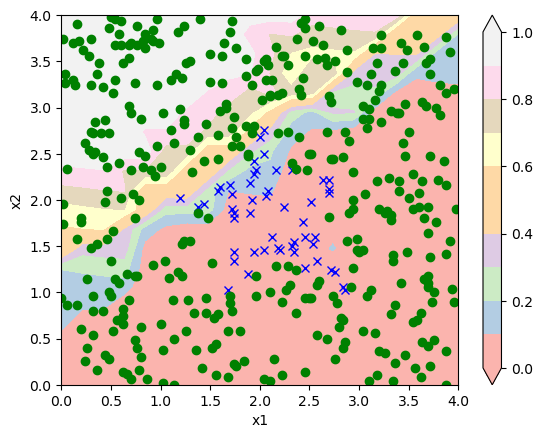

In [65]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[0]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_cat_h164.pdf')

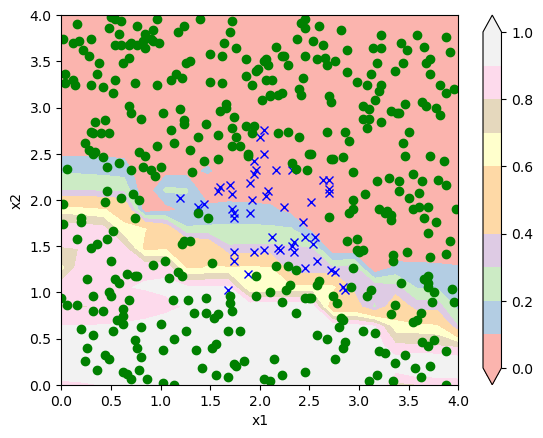

In [66]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[1]
step_y_pred = step_predict(X)
plot(X, Y, step_predict,'vq_cath264.pdf')

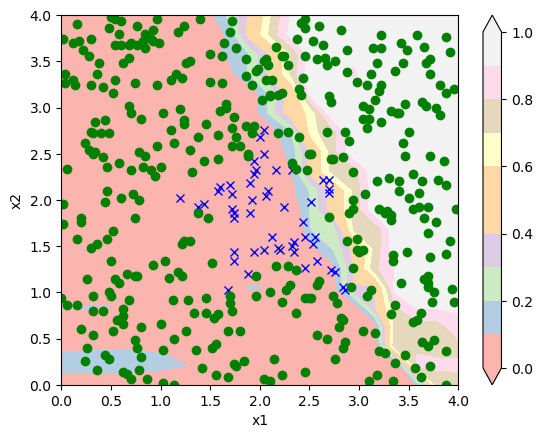

In [67]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[2]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h364.pdf')


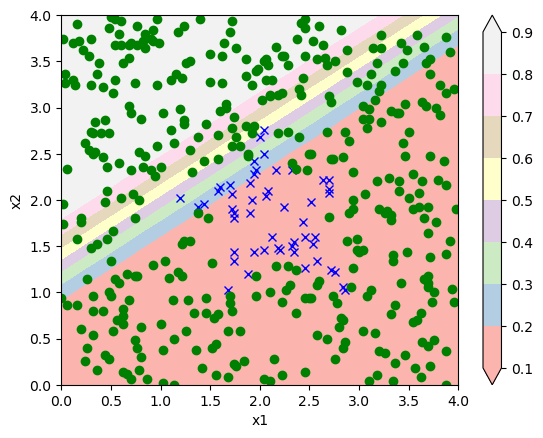

In [68]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[3]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_cath464.pdf')

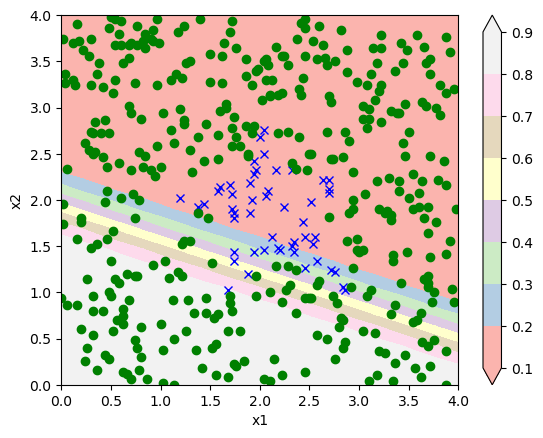

In [69]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[4]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h564.pdf')

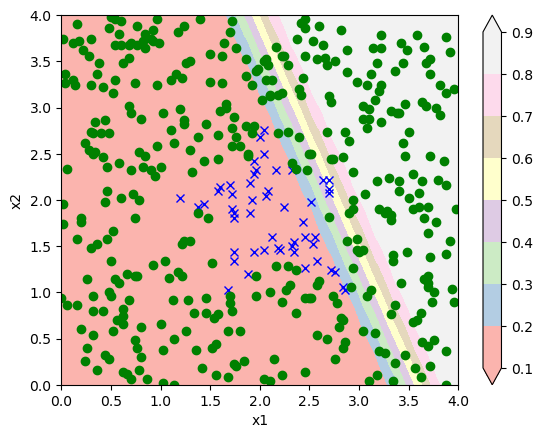

In [70]:
step_predict = lambda data: vqmodel.lin1ac(torch.Tensor(data))[0].detach().numpy().reshape(-1,1)[5]
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_h664.pdf')

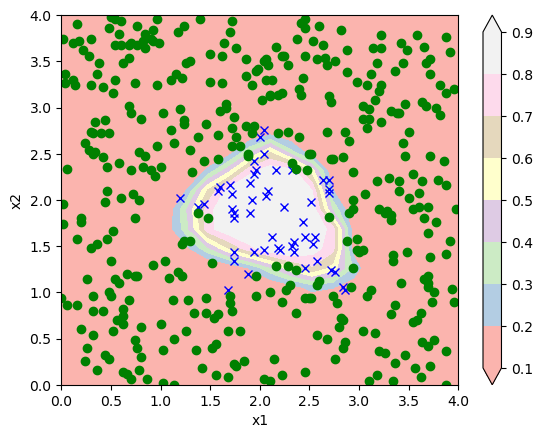

In [71]:
step_predict = lambda data: vqmodel(torch.Tensor(data))[0].detach().numpy()
step_y_pred = step_predict(X)
plot(X, Y, step_predict, 'vq_cato.pdf')

## VQ only experiment

In [33]:
# Same as linear regression! 
from vector_quantize import VectorQuantize

num_codes = 16

class VQModel(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(VQModel, self).__init__()
        self.l1 = nn.Linear(input_dim,12)
        self.vq1 = VectorQuantize(dim=12, accept_image_fmap=False, codebook_size=64, rotation_trick=True, straight_through=False, 
                                 learnable_codebook = False,ema_update = True)
        self.l2 = nn.Linear(12,12)
        self.vq2 = VectorQuantize(dim=12, accept_image_fmap=False, codebook_size=64, rotation_trick=True, straight_through=False, 
                                 learnable_codebook = False,ema_update = True)
        self.l3 = nn.Linear(12,4)
        self.vq3 = VectorQuantize(dim=4, accept_image_fmap=False, codebook_size=64, rotation_trick=True, straight_through=False, 
                                 learnable_codebook = False,ema_update = True)
        self.l4 = nn.Linear(4,1)

        
    def forward(self, x):
#         print(self.l1(x).shape)
#         x = self.l1(x).unsqueeze(0)
#         print(x.shape)
#         print(self.vq1(x[0]))
#         raise
#         print(self.vq1(self.l1(x).unsqueeze(1))[0].shape)
#         raise
        x = self.vq1(self.l1(x))[0]
        x = self.vq2(self.l2(x))[0]
        x = self.vq3(self.l3(x))[0]
        return torch.sigmoid(self.l4(x))
    
    

In [41]:
vqmodel = VQModel()
weights_init(vqmodel)
optimizer = optim.SGD(vqmodel.parameters(), lr=0.02, momentum=0.9)
loss_func = nn.BCELoss()

alpha = 0.25
epochs = 4000
batchsize = 16
steps = X.size(0)
for i in range(epochs):
    for j in range(0,steps,batchsize):
#         data_points = np.random.randint(X.size(0), size=448)
        end = min(j+batchsize, X.size(0))
        x_var = Variable(X[j:end], requires_grad=False)
        y_var = Variable(Y[j:end], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = vqmodel(x_var)
#         print('y_hat=', y_hat.shape, 'y_var=', y_var.shape)
        loss = loss_func.forward(y_hat.squeeze(), y_var)
#         print(loss)
        (loss).backward()
        optimizer.step()
        
#     if i % 500 == 0:
    y_hat_all = vqmodel(X)
    loss = loss_func.forward(y_hat_all.squeeze(), Y)
    print ("Epoch: {0}, Loss: {1}, ".format(i, loss.data.item()))

Epoch: 0, Loss: 11.385766983032227, 
Epoch: 1, Loss: 11.383928298950195, 
Epoch: 2, Loss: 11.38640022277832, 
Epoch: 3, Loss: 11.383928298950195, 
Epoch: 4, Loss: 11.383928298950195, 
Epoch: 5, Loss: 11.383928298950195, 
Epoch: 6, Loss: 11.383928298950195, 
Epoch: 7, Loss: 11.383928298950195, 
Epoch: 8, Loss: 11.383928298950195, 
Epoch: 9, Loss: 11.383928298950195, 
Epoch: 10, Loss: 11.383928298950195, 
Epoch: 11, Loss: 11.383928298950195, 
Epoch: 12, Loss: 11.383928298950195, 
Epoch: 13, Loss: 11.383928298950195, 
Epoch: 14, Loss: 11.383928298950195, 
Epoch: 15, Loss: 11.383928298950195, 
Epoch: 16, Loss: 11.383928298950195, 
Epoch: 17, Loss: 11.383928298950195, 
Epoch: 18, Loss: 11.383928298950195, 
Epoch: 19, Loss: 11.383928298950195, 
Epoch: 20, Loss: 11.383928298950195, 
Epoch: 21, Loss: 11.383928298950195, 
Epoch: 22, Loss: 11.383928298950195, 
Epoch: 23, Loss: 11.383928298950195, 
Epoch: 24, Loss: 11.383928298950195, 
Epoch: 25, Loss: 11.383928298950195, 
Epoch: 26, Loss: 11.383

Epoch: 213, Loss: 11.383928298950195, 
Epoch: 214, Loss: 11.383928298950195, 
Epoch: 215, Loss: 11.383928298950195, 
Epoch: 216, Loss: 11.383928298950195, 
Epoch: 217, Loss: 11.383928298950195, 
Epoch: 218, Loss: 11.383928298950195, 
Epoch: 219, Loss: 11.383928298950195, 
Epoch: 220, Loss: 11.383928298950195, 
Epoch: 221, Loss: 11.383928298950195, 
Epoch: 222, Loss: 11.383928298950195, 
Epoch: 223, Loss: 11.383928298950195, 
Epoch: 224, Loss: 11.383928298950195, 
Epoch: 225, Loss: 11.383928298950195, 
Epoch: 226, Loss: 11.383928298950195, 
Epoch: 227, Loss: 11.383928298950195, 
Epoch: 228, Loss: 11.383928298950195, 
Epoch: 229, Loss: 11.383928298950195, 
Epoch: 230, Loss: 11.383928298950195, 
Epoch: 231, Loss: 11.383928298950195, 
Epoch: 232, Loss: 11.383928298950195, 
Epoch: 233, Loss: 11.383928298950195, 
Epoch: 234, Loss: 11.383928298950195, 
Epoch: 235, Loss: 11.383928298950195, 
Epoch: 236, Loss: 11.383928298950195, 
Epoch: 237, Loss: 11.383928298950195, 
Epoch: 238, Loss: 11.3839

Epoch: 426, Loss: 11.383928298950195, 
Epoch: 427, Loss: 11.383928298950195, 
Epoch: 428, Loss: 11.383928298950195, 
Epoch: 429, Loss: 11.383928298950195, 
Epoch: 430, Loss: 11.383928298950195, 
Epoch: 431, Loss: 11.383928298950195, 
Epoch: 432, Loss: 11.383928298950195, 
Epoch: 433, Loss: 11.383928298950195, 
Epoch: 434, Loss: 11.383928298950195, 
Epoch: 435, Loss: 11.383928298950195, 
Epoch: 436, Loss: 11.383928298950195, 
Epoch: 437, Loss: 11.383928298950195, 
Epoch: 438, Loss: 11.383928298950195, 
Epoch: 439, Loss: 11.383928298950195, 
Epoch: 440, Loss: 11.383928298950195, 
Epoch: 441, Loss: 11.383928298950195, 
Epoch: 442, Loss: 11.383928298950195, 
Epoch: 443, Loss: 11.383928298950195, 
Epoch: 444, Loss: 11.383928298950195, 
Epoch: 445, Loss: 11.383928298950195, 
Epoch: 446, Loss: 11.383928298950195, 
Epoch: 447, Loss: 11.383928298950195, 
Epoch: 448, Loss: 11.383928298950195, 
Epoch: 449, Loss: 11.383928298950195, 
Epoch: 450, Loss: 11.383928298950195, 
Epoch: 451, Loss: 11.3839

Epoch: 637, Loss: 11.383928298950195, 
Epoch: 638, Loss: 11.383928298950195, 
Epoch: 639, Loss: 11.383928298950195, 
Epoch: 640, Loss: 11.383928298950195, 
Epoch: 641, Loss: 11.383928298950195, 
Epoch: 642, Loss: 11.383928298950195, 
Epoch: 643, Loss: 11.383928298950195, 
Epoch: 644, Loss: 11.383928298950195, 
Epoch: 645, Loss: 11.383928298950195, 
Epoch: 646, Loss: 11.383928298950195, 
Epoch: 647, Loss: 11.383928298950195, 
Epoch: 648, Loss: 11.383928298950195, 
Epoch: 649, Loss: 11.383928298950195, 
Epoch: 650, Loss: 11.383928298950195, 
Epoch: 651, Loss: 11.383928298950195, 
Epoch: 652, Loss: 11.383928298950195, 
Epoch: 653, Loss: 11.383928298950195, 
Epoch: 654, Loss: 11.383928298950195, 
Epoch: 655, Loss: 11.383928298950195, 
Epoch: 656, Loss: 11.383928298950195, 
Epoch: 657, Loss: 11.383928298950195, 
Epoch: 658, Loss: 11.383928298950195, 
Epoch: 659, Loss: 11.383928298950195, 
Epoch: 660, Loss: 11.383928298950195, 
Epoch: 661, Loss: 11.383928298950195, 
Epoch: 662, Loss: 11.3839

KeyboardInterrupt: 

In [42]:
print((vqmodel.vq1._codebook.embed))
print((vqmodel.vq2._codebook.embed))
print((vqmodel.vq3._codebook.embed))
print(list(vqmodel.parameters()))

tensor([[[-2.8027e-40, -2.8027e-40, -2.8027e-40, -2.8027e-40,  2.8027e-40,
          -2.8027e-40, -2.8027e-40, -2.8027e-40, -2.8027e-40, -2.8027e-40,
           2.8027e-40, -2.8027e-40],
         [ 5.7637e+00, -2.3202e+01, -1.3363e+01,  7.4064e-01, -1.5177e+01,
           4.5486e+00, -2.2237e+00,  3.0772e+00, -4.3150e-01, -2.1602e+00,
           1.2567e+01, -1.3683e+01],
         [-2.8027e-40,  2.8027e-40, -2.8027e-40,  2.8027e-40,  2.8027e-40,
           2.8027e-40, -2.8027e-40, -2.8027e-40, -2.8027e-40,  2.8027e-40,
          -2.8027e-40,  2.8027e-40],
         [-2.8027e-40, -2.8027e-40,  2.8027e-40,  2.8027e-40, -2.8027e-40,
           2.8027e-40,  2.8027e-40,  2.8027e-40, -2.8027e-40,  2.8027e-40,
          -2.8027e-40,  2.8027e-40],
         [ 2.8027e-40,  2.8027e-40,  2.8027e-40, -2.8027e-40, -2.8027e-40,
           2.8027e-40,  2.8027e-40, -2.8027e-40,  2.8027e-40,  2.8027e-40,
           2.8027e-40, -2.8027e-40],
         [ 2.8027e-40,  2.8027e-40,  2.8027e-40, -2.8027e-40, -2.